In [1]:
import pandas as pd
import numpy as np

In [2]:
pm_map = pd.read_csv('../../data/a1/pm_bangkok_avg.csv')

In [3]:
pm_map

,date,avg
0,2011-05-16,44.000000
1,2011-05-17,45.000000
2,2011-05-18,45.000000
3,2011-05-19,49.000000
4,2011-05-20,43.000000
...,...,...
4741,2024-12-27,38.658333
4742,2024-12-28,24.716667
4743,2024-12-29,21.908333
4744,2024-12-30,31.600000


In [4]:
weather = pd.read_csv('../../data/weather/bangkok_weather.csv')

In [5]:
weather

,date,temperature_max,temperature_avg,temperature_min,dew_point_max,dew_point_avg,dew_point_min,humidity_max,humidity_avg,humidity_min,wind_speed_max,wind_speed_avg,wind_speed_min,pressure_max,pressure_avg,pressure_min,precipitation
0,2025-04-01,95.0,86.3,79.0,79.0,75.6,72.0,94.0,72.6,49.0,10.0,5.1,0.0,29.9,29.8,29.7,0.0
1,2025-04-02,95.0,87.4,82.0,79.0,72.7,66.0,89.0,63.7,41.0,12.0,6.5,2.0,29.9,29.8,29.8,0.0
2,2025-04-03,95.0,87.0,82.0,77.0,74.0,70.0,84.0,66.1,46.0,14.0,6.8,2.0,29.9,29.9,29.8,0.0
3,2025-04-04,93.0,86.4,82.0,77.0,74.8,73.0,84.0,69.1,52.0,15.0,7.7,2.0,29.9,29.8,29.7,0.0
4,2025-04-05,95.0,87.2,82.0,79.0,75.0,73.0,84.0,68.1,49.0,13.0,7.8,3.0,29.9,29.8,29.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9762,1997-01-27,84.0,77.0,73.0,70.0,66.6,64.0,88.0,71.1,55.0,10.0,5.4,0.0,30.0,29.9,29.9,0.0
9763,1997-01-28,91.0,81.7,72.0,68.0,66.2,64.0,88.0,62.3,41.0,6.0,2.6,0.0,30.0,29.9,29.8,0.0
9764,1997-01-29,95.0,84.2,73.0,68.0,63.7,59.0,69.0,52.2,32.0,10.0,2.1,0.0,29.9,26.9,0.0,0.0
9765,1997-01-30,95.0,83.0,73.0,75.0,71.6,70.0,94.0,70.6,49.0,8.0,1.7,0.0,29.8,29.8,29.7,0.0


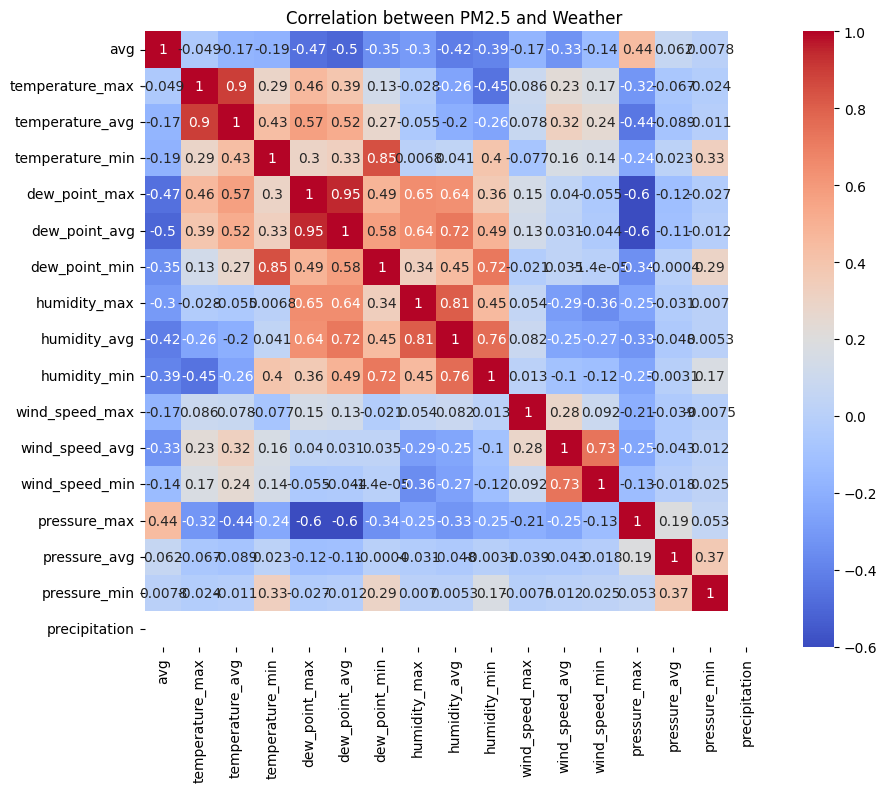

In [6]:
#now merge two dataframes and use date as index
pm_map['date'] = pd.to_datetime(pm_map['date'])
weather['date'] = pd.to_datetime(weather['date'])
pm_map.set_index('date', inplace=True)
weather.set_index('date', inplace=True)
pm_map = pm_map.merge(weather, left_index=True, right_index=True)
pm_map
#now we can see the correlation between pm2.5 and weather
pm_map.corr()

#plot the correlation
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(pm_map.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between PM2.5 and Weather')
plt.show()

C:\Users\poyni\AppData\Local\Temp\ipykernel_16820\1606208233.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pm_map_monthly = pm_map.resample('M').mean()


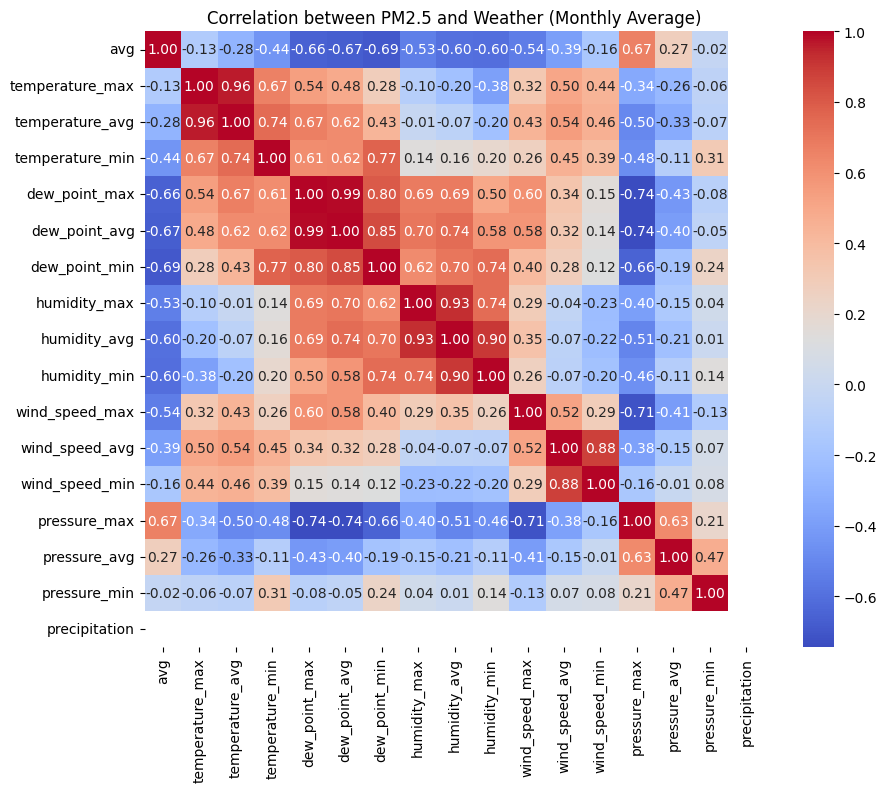

In [22]:
# Resample monthly using mean
pm_map_monthly = pm_map.resample('M').mean()

plt.figure(figsize=(10, 8))
sns.heatmap(pm_map_monthly.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between PM2.5 and Weather (Monthly Average)')
plt.show()


In [23]:
import pandas as pd

correlation_matrix = pm_map_monthly.corr(numeric_only=True)

target_corr = correlation_matrix['avg'].drop('avg')

selected_features = target_corr[abs(target_corr) > 0.3].index.tolist()

print(target_corr[abs(target_corr) > 0.3])

temperature_min   -0.438642
dew_point_max     -0.659836
dew_point_avg     -0.669777
dew_point_min     -0.694849
humidity_max      -0.534945
humidity_avg      -0.598135
humidity_min      -0.602864
wind_speed_max    -0.543985
wind_speed_avg    -0.394464
pressure_max       0.665480
Name: avg, dtype: float64


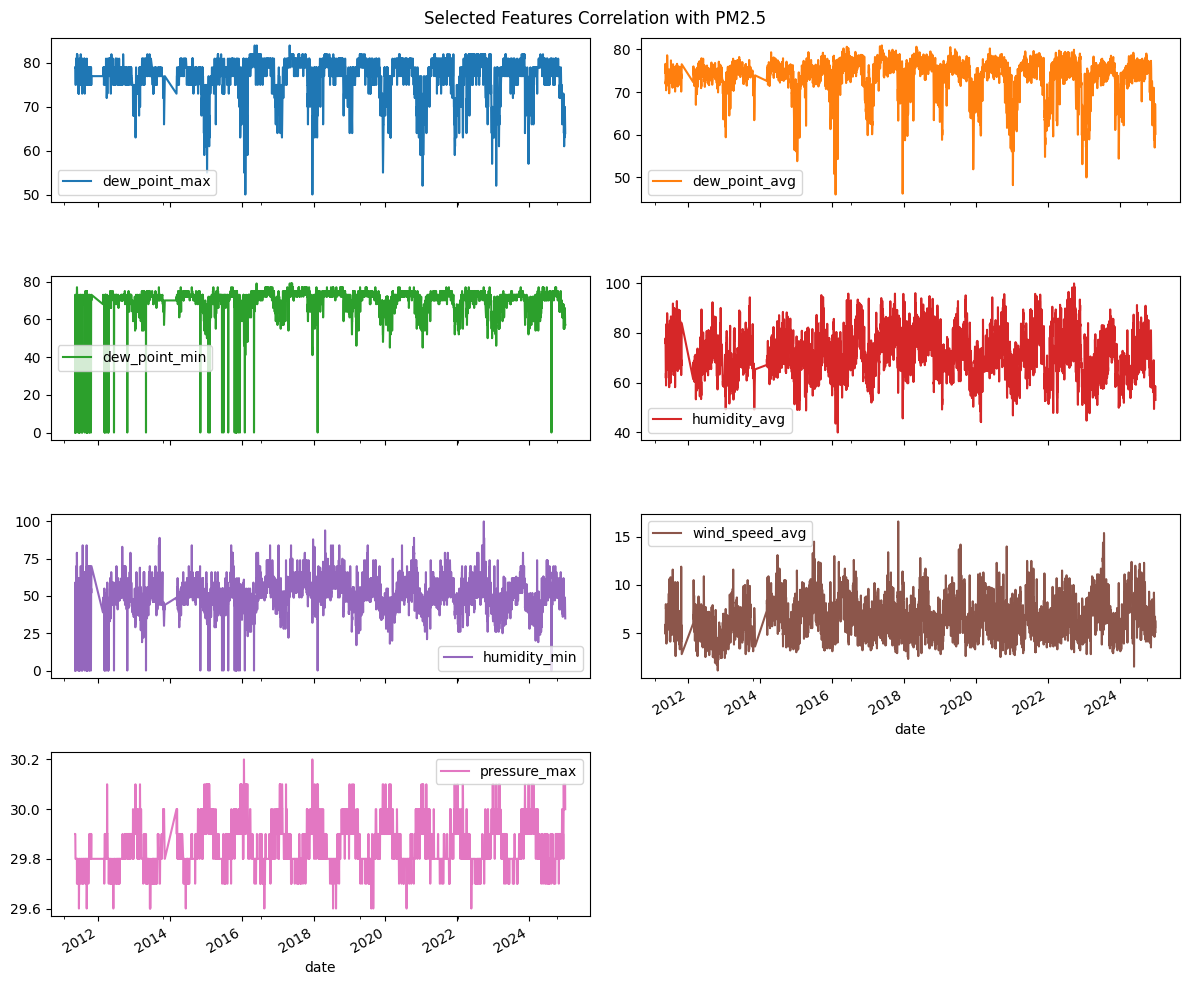

In [8]:
selected_features = [
    'dew_point_max',
    'dew_point_avg',
    'dew_point_min',
    'humidity_avg',
    'humidity_min',
    'wind_speed_avg',
    'pressure_max'
]

import matplotlib.pyplot as plt

# Ensure your index is datetime for time series plotting
pm_map.index = pd.to_datetime(pm_map.index)

# Plot each selected feature as a subplot
pm_map[selected_features].plot(
    subplots=True,
    figsize=(12, 10),
    layout=(4, 2),  # Adjust based on number of plots (7 → 4 rows x 2 columns)
    title='Selected Features Correlation with PM2.5'
)

plt.tight_layout()
plt.show()

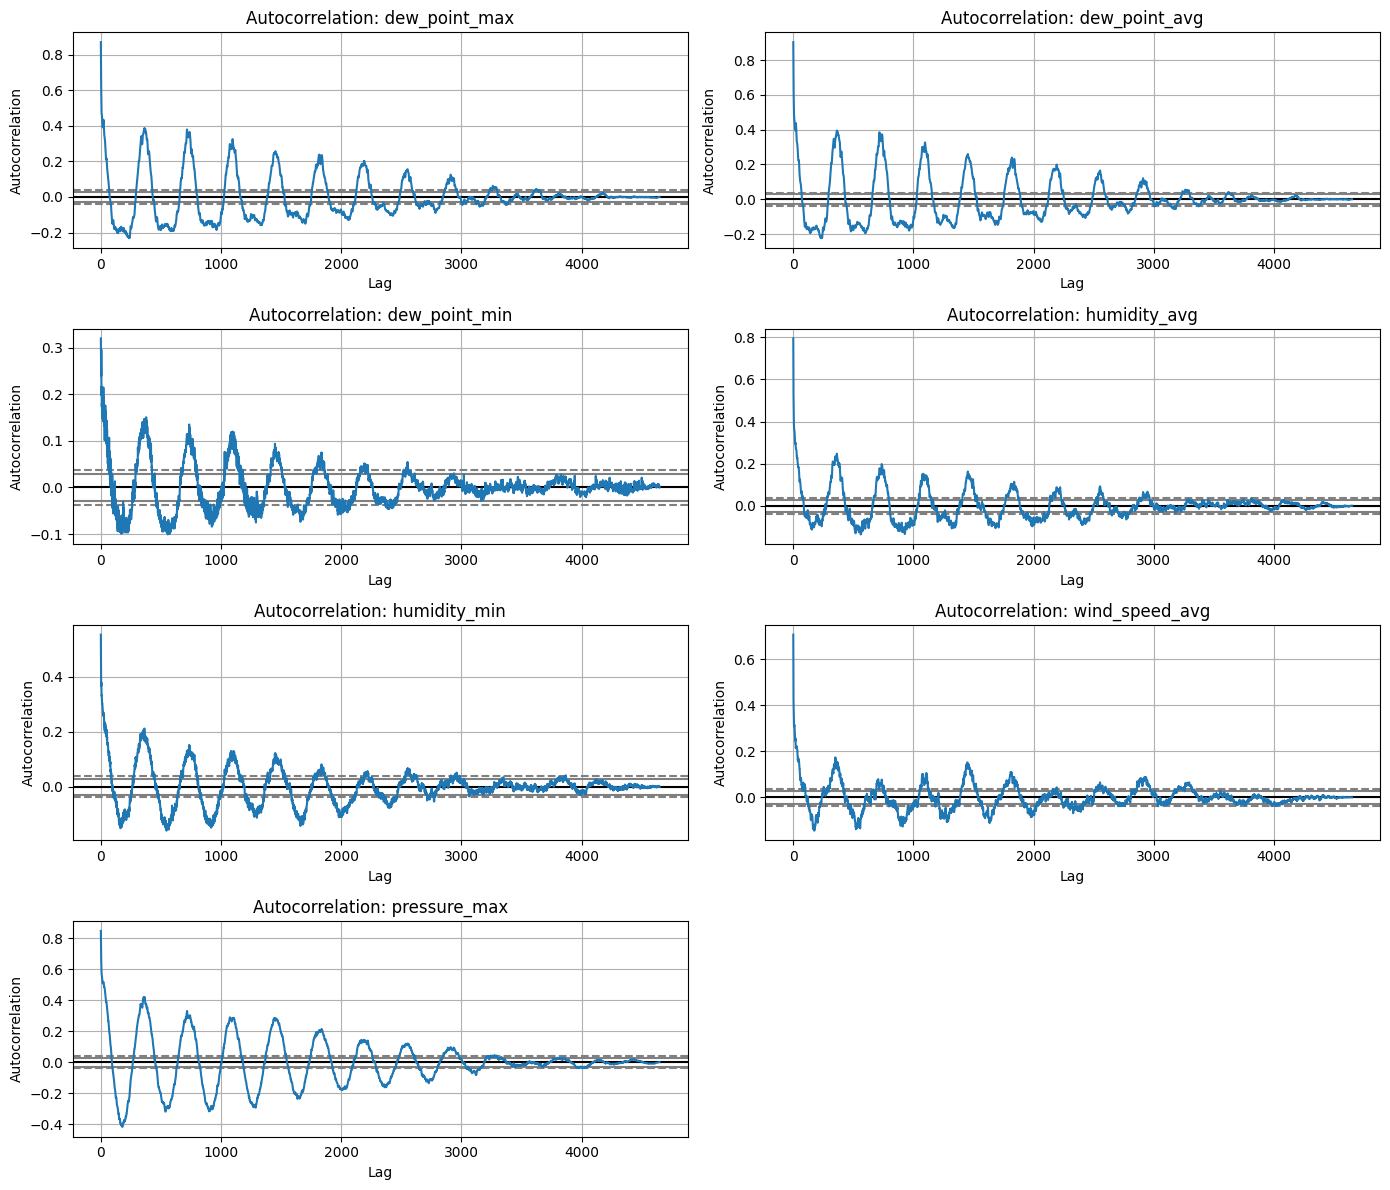

In [9]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 12))
axes = axes.flatten()

# Plot autocorrelation for each feature
for i, feature in enumerate(selected_features):
    autocorrelation_plot(pm_map[feature].dropna(), ax=axes[i])
    axes[i].set_title(f'Autocorrelation: {feature}')

# Hide unused subplot if any
for j in range(len(selected_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

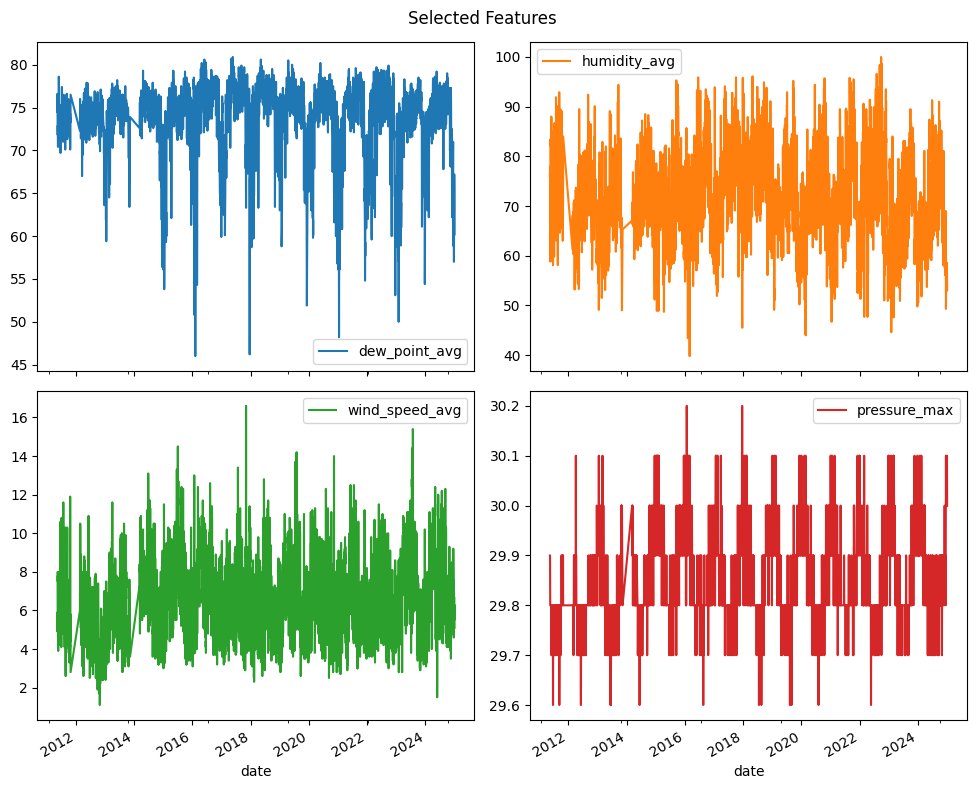

In [10]:
# Plot the selected features
features_to_plot = ['dew_point_avg', 'humidity_avg', 'wind_speed_avg', 'pressure_max']

pm_map[features_to_plot].plot(
    subplots=True,
    figsize=(10, 8),
    layout=(2, 2),  # 2 rows x 2 columns
    title='Selected Features'
)

plt.tight_layout()
plt.show()

In [11]:
resampled_pm_map = pm_map.resample('M').mean()

resampled_pm_map

C:\Users\poyni\AppData\Local\Temp\ipykernel_16820\2811355096.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled_pm_map = pm_map.resample('M').mean()


,avg,temperature_max,temperature_avg,temperature_min,dew_point_max,dew_point_avg,dew_point_min,humidity_max,humidity_avg,humidity_min,wind_speed_max,wind_speed_avg,wind_speed_min,pressure_max,pressure_avg,pressure_min,precipitation
date,,,,,,,,,,,,,,,,,
2011-05-31,31.812500,92.687500,84.618750,64.062500,78.125000,74.181250,57.937500,89.250000,72.050000,43.062500,14.125000,5.762500,0.875000,29.818750,29.575000,22.237500,0.0
2011-06-30,28.433333,90.733333,84.430000,73.766667,77.800000,74.066667,65.766667,88.000000,72.106667,50.166667,17.966667,6.896667,1.500000,29.756667,29.636667,26.656667,0.0
2011-07-31,24.741935,90.129032,83.212903,70.483871,77.677419,73.803226,61.677419,91.354839,74.603226,47.709677,15.354839,6.909677,1.258065,29.764516,29.648387,26.774194,0.0
2011-08-31,25.967742,90.483871,83.380645,75.580645,77.322581,73.783871,68.774194,90.290323,74.232258,52.935484,14.935484,6.106452,1.096774,29.787097,29.345161,27.741935,0.0
2011-09-30,28.533333,89.600000,82.736667,67.400000,77.200000,73.633333,61.666667,93.200000,75.316667,48.533333,15.233333,6.640000,1.266667,29.786667,29.693333,27.666667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,13.694477,93.290323,85.374194,77.193548,78.612903,75.390323,70.387097,90.387097,73.041935,51.387097,14.967742,7.058065,1.870968,29.816129,29.758065,29.667742,0.0
2024-09-30,17.045615,91.566667,84.756667,79.200000,78.333333,75.580000,73.266667,91.466667,75.266667,56.566667,15.200000,7.230000,2.066667,29.783333,29.710000,29.640000,0.0
2024-10-31,20.406878,91.612903,84.370968,78.967742,78.612903,75.712903,72.580645,93.000000,76.603226,55.193548,13.129032,5.570968,0.903226,29.864516,29.764516,28.748387,0.0


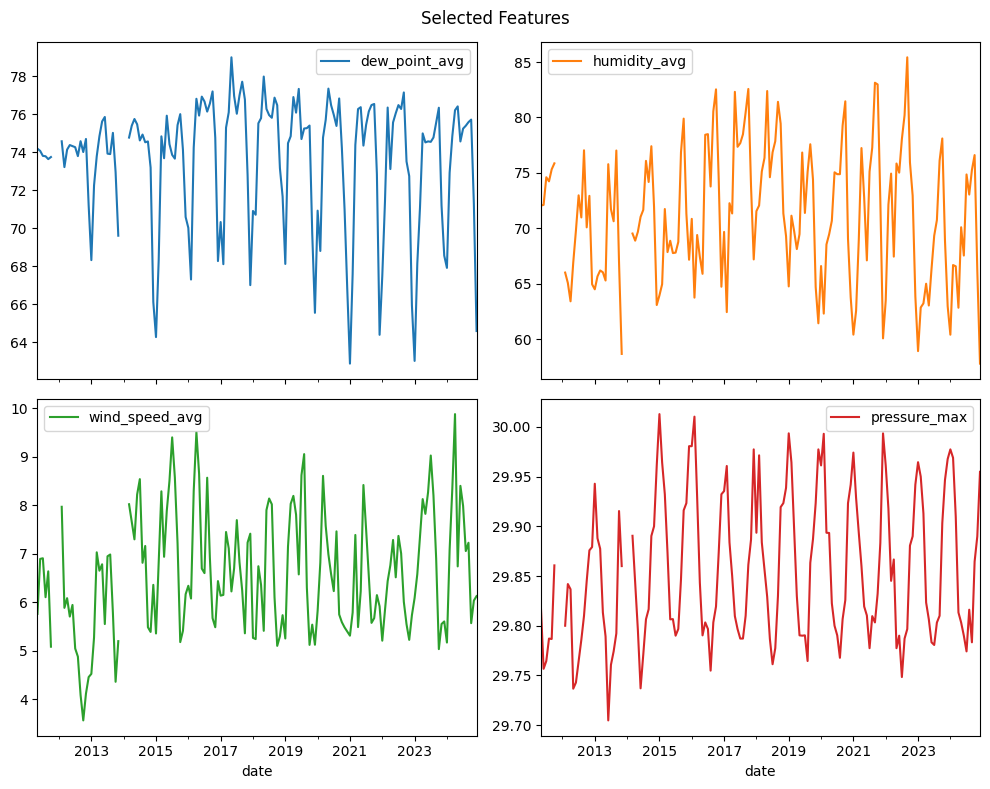

In [12]:
features_to_plot = ['dew_point_avg', 'humidity_avg', 'wind_speed_avg', 'pressure_max']

resampled_pm_map[features_to_plot].plot(
    subplots=True,
    figsize=(10, 8),
    layout=(2, 2),
    title='Selected Features'
)

plt.tight_layout()
plt.show()

In [13]:
#knn imputer
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights='uniform')
imputed_data = imputer.fit_transform(resampled_pm_map[selected_features])
imputed_pm_map = pd.DataFrame(imputed_data, columns=selected_features, index=resampled_pm_map.index)
imputed_pm_map = imputed_pm_map.loc[resampled_pm_map.index]  # Align the index with the original DataFrame

# Fill the original DataFrame with imputed values
resampled_pm_map[selected_features] = imputed_pm_map[selected_features]
resampled_pm_map[selected_features].isnull().sum()

dew_point_max     0
dew_point_avg     0
dew_point_min     0
humidity_avg      0
humidity_min      0
wind_speed_avg    0
pressure_max      0
dtype: int64

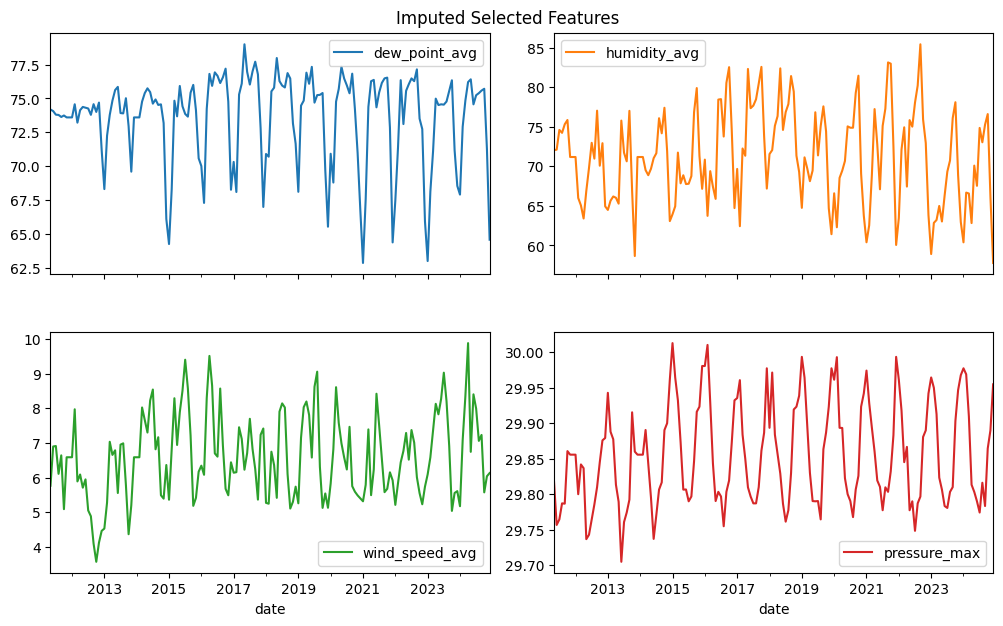

In [14]:
#plot the imputed data
imputed_pm_map[features_to_plot].plot(
    subplots=True,
    figsize=(10, 12),
    layout=(4, 2),  # Adjusted layout to fit 7 subplots (4 rows x 2 columns)
    title='Imputed Selected Features'
)

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()

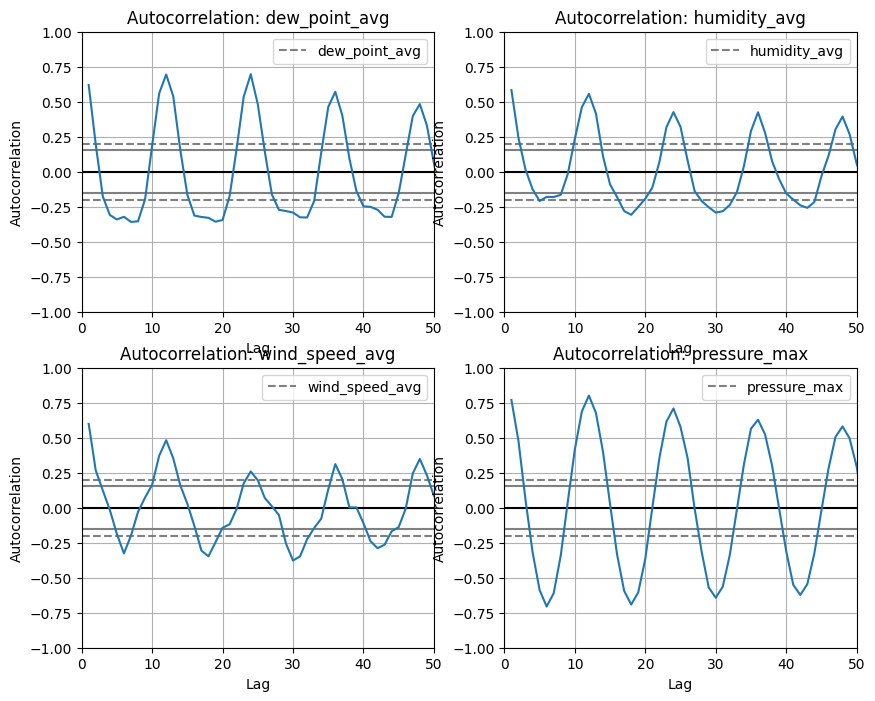

In [15]:
# plot the imputed data with autocorrelation
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

# Plot autocorrelation for each feature
for i, feature in enumerate(features_to_plot):
    autocorrelation_plot(resampled_pm_map[feature].dropna(), ax=axes[i])
    axes[i].set_title(f'Autocorrelation: {feature}')
    axes[i].set_xlabel('Lag')
    axes[i].set_ylabel('Autocorrelation')
    axes[i].set_xlim(0, 50)  # Set x-axis limit to 50 lags
    axes[i].set_ylim(-1, 1)  # Set y-axis limit to -1 to 1
    axes[i].grid(True)  # Add grid for better readability
    axes[i].legend([feature], loc='upper right')  # Add legend for each plot
    axes[i].set_title(f'Autocorrelation: {feature}')

Fitting SARIMA for dew_point_avg...


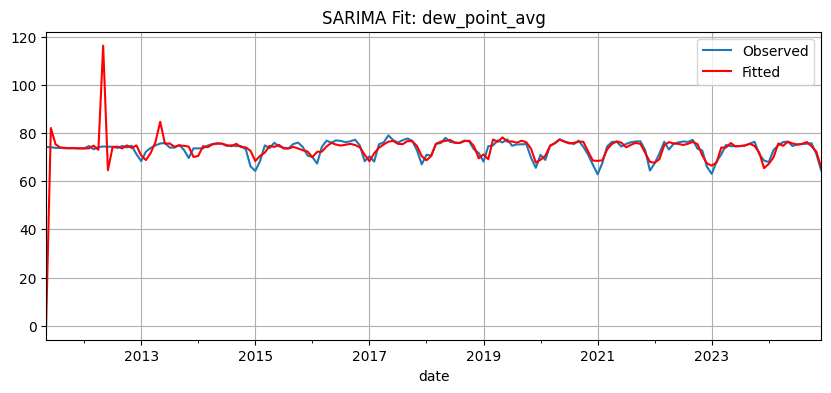

Fitting SARIMA for humidity_avg...


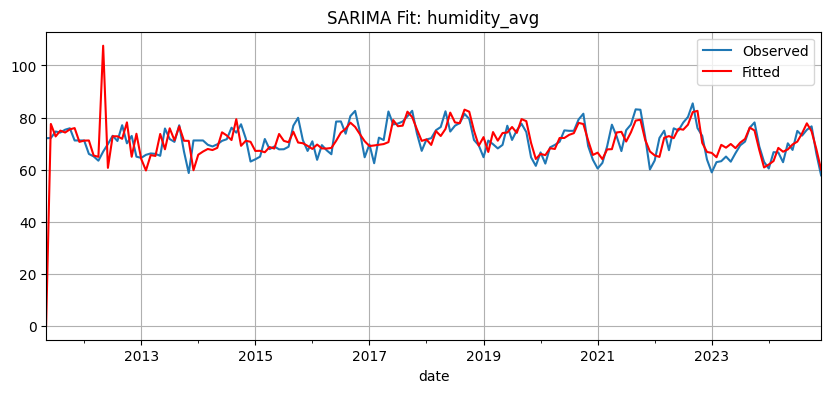

Fitting SARIMA for wind_speed_avg...


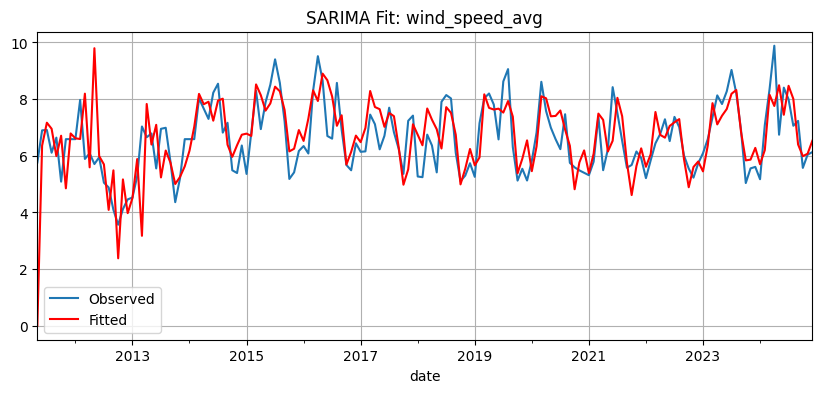

Fitting SARIMA for pressure_max...


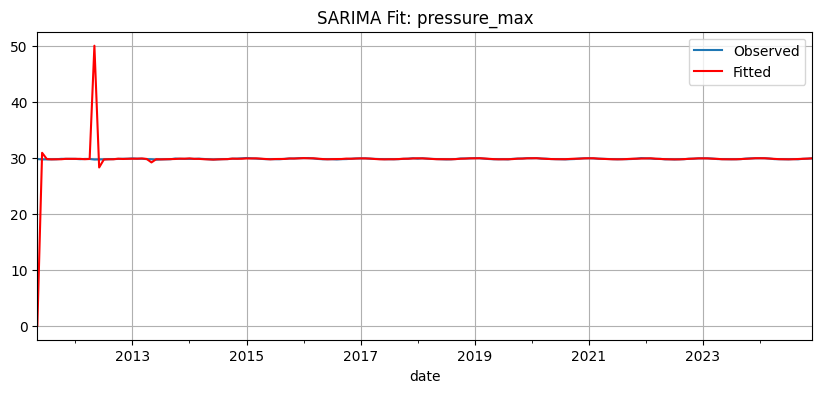

In [16]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMA order (p,d,q)(P,D,Q,s)
# These should ideally be tuned per feature — here we use a placeholder
sarima_order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)  # assuming monthly seasonality; change '12' to your frequency

sarima_results = {}

for feature in features_to_plot:
    print(f"Fitting SARIMA for {feature}...")
    
    y = resampled_pm_map[feature].dropna()

    try:
        model = SARIMAX(y, order=sarima_order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
        result = model.fit(disp=False)
        sarima_results[feature] = result

        # Plot
        fig, ax = plt.subplots(figsize=(10, 4))
        y.plot(ax=ax, label='Observed')
        result.fittedvalues.plot(ax=ax, label='Fitted', color='red')
        ax.set_title(f'SARIMA Fit: {feature}')
        ax.legend()
        plt.grid(True)
        plt.show()
        
    except Exception as e:
        print(f"Failed to fit SARIMA for {feature}: {e}")


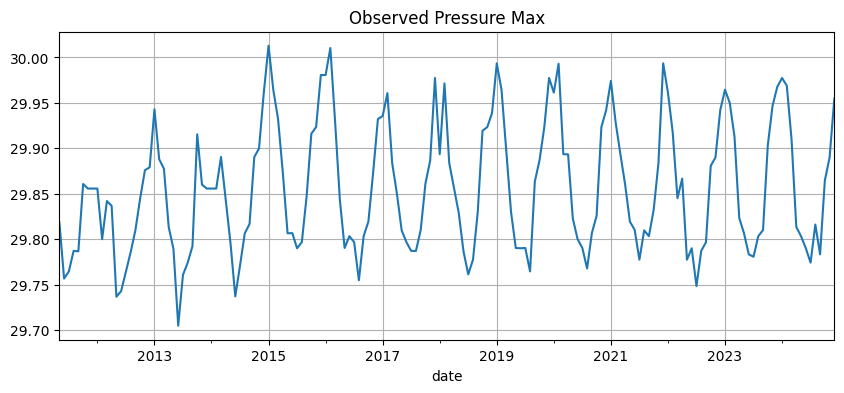

In [17]:
#print pressure_max observed
resampled_pm_map['pressure_max'].plot(figsize=(10, 4), title='Observed Pressure Max')
plt.grid(True)
plt.show()

                                     SARIMAX Results                                      
Dep. Variable:                       pressure_max   No. Observations:                  164
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 285.504
Date:                            Thu, 08 May 2025   AIC                           -561.009
Time:                                    22:03:59   BIC                           -546.409
Sample:                                05-31-2011   HQIC                          -555.076
                                     - 12-31-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1135      0.120      0.945      0.345      -0.122       0.349
ma.L1         -0.8035      0.081   

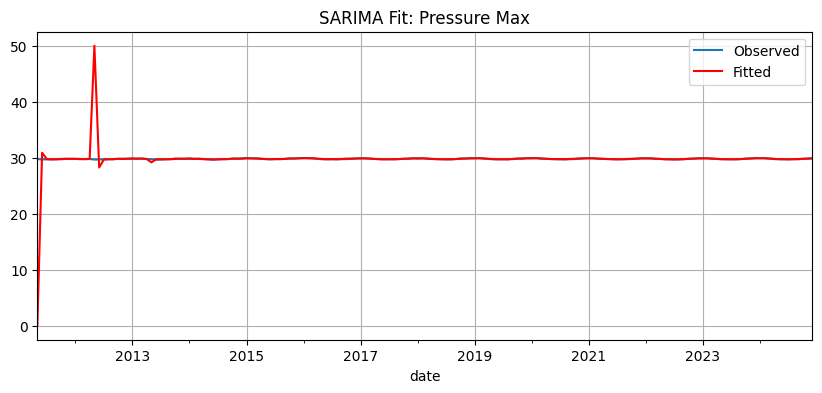

In [18]:
# fit SARIMA for pressure_max
y = resampled_pm_map['pressure_max'].dropna()
sarima_order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)  # assuming monthly seasonality; change '12' to your frequency
model = SARIMAX(y, order=sarima_order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
result = model.fit(disp=False)
print(result.summary())
# Plot the observed vs fitted values
fig, ax = plt.subplots(figsize=(10, 4))
y.plot(ax=ax, label='Observed')
result.fittedvalues.plot(ax=ax, label='Fitted', color='red')
ax.set_title('SARIMA Fit: Pressure Max')
ax.legend()
plt.grid(True)
plt.show()

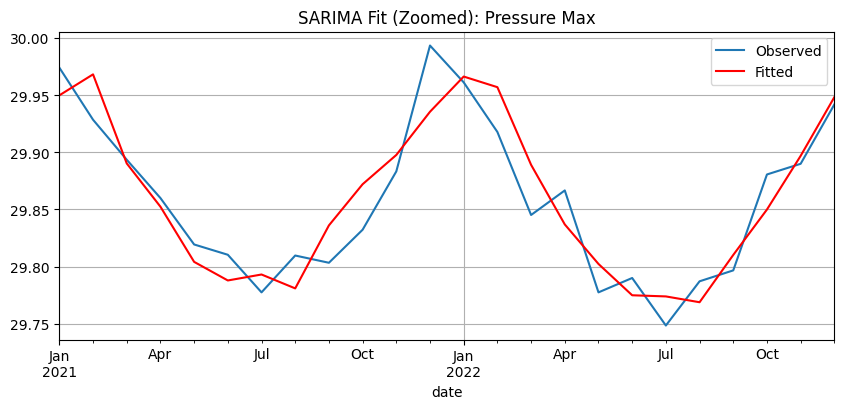

In [19]:
#zoom for the last 2 years
start_date = '2021-01-01'
end_date = '2023-01-01'
y_zoomed = y[start_date:end_date]
fitted_zoomed = result.fittedvalues[start_date:end_date]
fig, ax = plt.subplots(figsize=(10, 4))
y_zoomed.plot(ax=ax, label='Observed')
fitted_zoomed.plot(ax=ax, label='Fitted', color='red')
ax.set_title('SARIMA Fit (Zoomed): Pressure Max')
ax.legend()
plt.grid(True)
plt.show()

Fitting SARIMA for dew_point_avg...


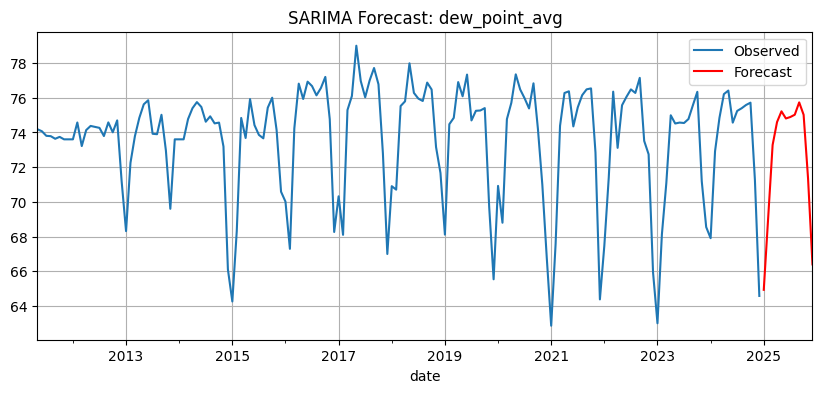

Fitting SARIMA for humidity_avg...


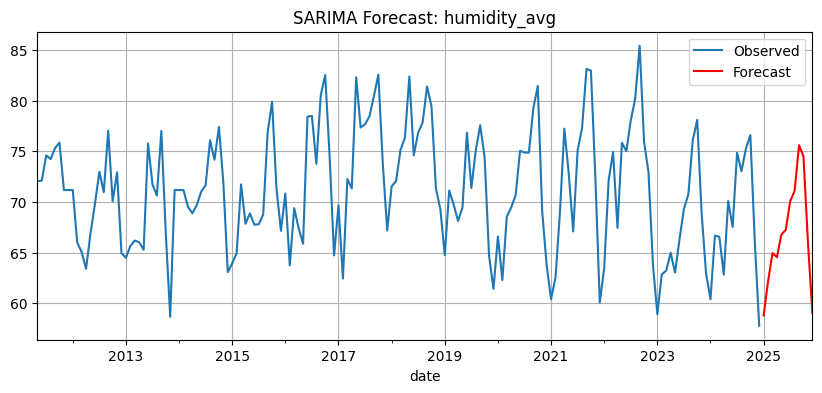

Fitting SARIMA for wind_speed_avg...


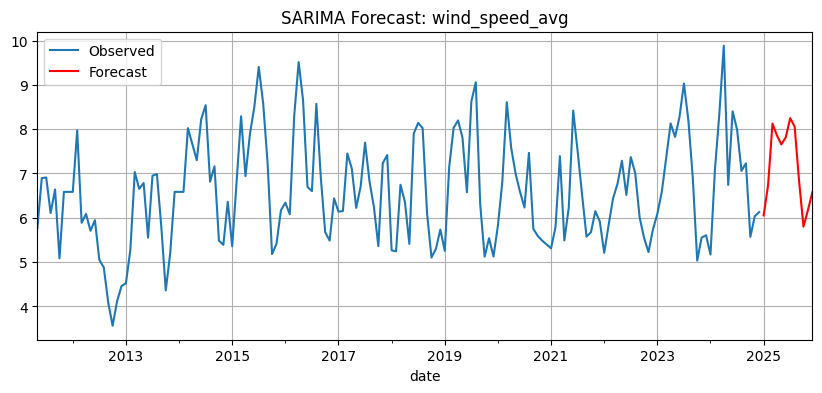

Fitting SARIMA for pressure_max...


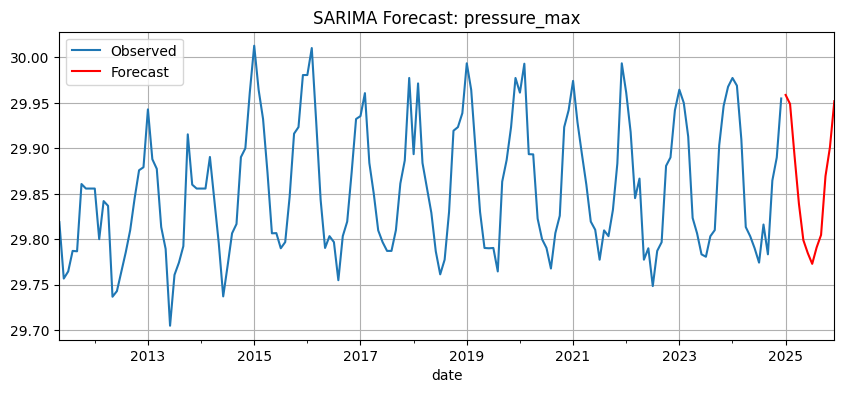

In [20]:
# now do all but predict the next 12 months od each feature
sarima_results = {}
predictions = {}
for feature in features_to_plot:
    print(f"Fitting SARIMA for {feature}...")
    
    y = resampled_pm_map[feature].dropna()

    try:
        model = SARIMAX(y, order=sarima_order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
        result = model.fit(disp=False)
        sarima_results[feature] = result

        # Forecast the next 12 months
        forecast = result.get_forecast(steps=12)
        predictions[feature] = forecast.predicted_mean

        # Plot
        fig, ax = plt.subplots(figsize=(10, 4))
        y.plot(ax=ax, label='Observed')
        forecast.predicted_mean.plot(ax=ax, label='Forecast', color='red')
        ax.set_title(f'SARIMA Forecast: {feature}')
        ax.legend()
        plt.grid(True)
        plt.show()
        
    except Exception as e:
        print(f"Failed to fit SARIMA for {feature}: {e}")

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

for feature, result in sarima_results.items():
    y_true = resampled_pm_map[feature].dropna()
    y_pred = result.fittedvalues

    # Align indices
    y_true, y_pred = y_true.align(y_pred, join='inner')

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    if (y_true != 0).all():
        mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    else:
        mape = np.nan


    print(f"Feature: {feature}")
    print(f"  MAE:  {mae:.3f}")
    print(f"  RMSE: {rmse:.3f}")
    print(f"  MAPE: {mape:.2f}%")
    print("-" * 30)

Feature: dew_point_avg
  MAE:  2.186
  RMSE: 6.997
  MAPE: 3.01%
------------------------------
Feature: humidity_avg
  MAE:  3.986
  RMSE: 7.723
  MAPE: 5.67%
------------------------------
Feature: wind_speed_avg
  MAE:  0.757
  RMSE: 1.054
  MAPE: 11.95%
------------------------------
Feature: pressure_max
  MAE:  0.350
  RMSE: 2.824
  MAPE: 1.17%
------------------------------
